Programmer: Jovan Koledin

Class: CPSC 222-02, Fall 2022

Final Project

12/05/22

Title: Jovan's Basketball statistics 

# My Basketball Game Statistics

## Introduction

I am interested in my Basketball statistics because I have recently started playing basketball alot at the RFC. I am trying to improve, and I think it would be interesting and helpful to have my stats across many games to look at to see the areas in which I can improve the most. I recorded my stats in a Excel file which I then saved in the .csv format. 
* The data was collected manually after each of my basketball games
* There are 70 instances with 14 attributes each and no missing values 
* The attributes are very self explanatory and if you go to Gonzaga you probably understand how to read basketball statistics 
* The attributes not commonly found in typical Basketball stat lines are the compliments given and compliments received 
* I am curious to see if giving out more compliments to my teamamtes will increase our win likelyhood 
* I am also curious to see if the amount of compliments I receive affect my teams win likelyhood 
* I am also interested in seeing how my performance compares for 5-on-5 and 3-on-3 games 
* The target attribute or y value that I am trying to classify is my Win/Loss column

My results will help me better understand what attributes contribute to wins the most and which attributes I need to spend the most time working on. Top NBA recruiters are the main stakeholders who are interested in my results.  

**Load Data**

In [1]:
import pandas as pd
import utils

df = pd.read_csv("Basketball_games.csv", index_col=0)
print(df.head())

             date  Two-pointers made  Two-pointers attempted  \
Game#                                                          
1      2022-09-21                  0                       2   
2      2022-09-21                  1                       1   
3      2022-09-21                  0                       0   
4      2022-09-30                  0                       0   
5      2022-10-01                  0                       0   

       Three-pointers made  Three-pointers attempted  Assists  Turnovers  \
Game#                                                                      
1                        0                         1        3          2   
2                        2                         3        2          1   
3                        0                         3        2          2   
4                        1                         2        2          2   
5                        2                         3        3          0   

       Compliments

## Data Analysis

I aggregatted the Spokane weather data with the API functionality developed in DA4. I had a challenge with the date column formatting but I was able to match it by adjusting my excel file that contained my basketball excel file. I chose visualizations like histograms and scatter plots that showed which attributes contributed to wins the most. I also compared my statistics from different game types (5-on-5, 3-on-3). I did a hypothesis test ot see if I scored more points in 3-on-3 games vs 5-on-5 games. 

**Cleaning**

Convert W/L columns to 1/0s and convert Game Type column from 5-on-5/3-on-3 to 1/0s

In [2]:
df = utils.cleaner(df)

**Merging**

Merge my basketball stats with Spokane weather data using DA4 utils functions

In [3]:
df = utils.add_weather(df)
print(df)

          date  Two-pointers made  Two-pointers attempted  \
0   2022-09-21                  0                       2   
1   2022-09-21                  1                       1   
2   2022-09-21                  0                       0   
3   2022-09-30                  0                       0   
4   2022-10-01                  0                       0   
..         ...                ...                     ...   
65  2022-12-03                  2                       3   
66  2022-12-03                  2                       2   
67  2022-12-03                  3                       4   
68  2022-12-03                  1                       3   
69  2022-12-03                  1                       2   

    Three-pointers made  Three-pointers attempted  Assists  Turnovers  \
0                     0                         1        3          2   
1                     2                         3        2          1   
2                     0                         

**Visualization**

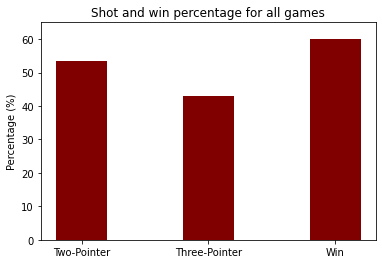

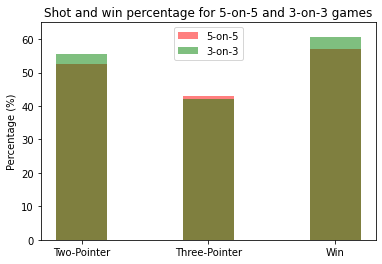

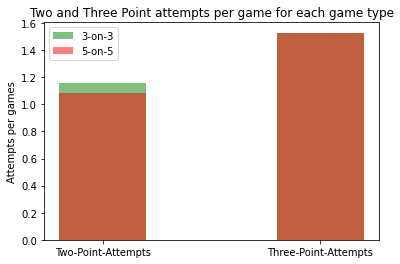

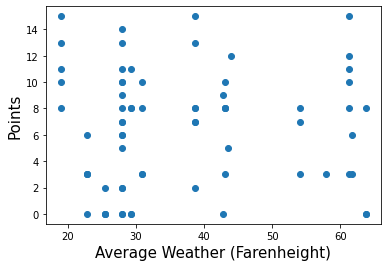

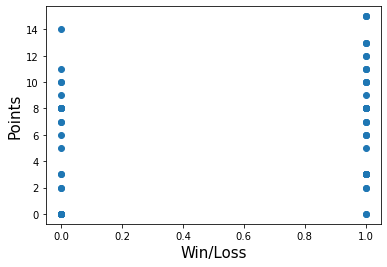

In [4]:
utils.visualize(df)

**Hypothesis Testing**

Did Jovan score more points on average in 3-on-3 games versus 5-on-5 games?

In [5]:
utils.most_points(df)

Average points for 5-on-5 games: 5.32
Average points for 3-on-3 games: 8.04
Jovan scores more points in 3-on-3 games versus 5-on-5 games


Did I receive more compliments during winning games?

In [6]:
utils.comp_received(df)

Average compliments recieved for winning games:  2.14
Average compliments recieved for losing games:  1.11
Jovan recieved more compliments during winning games


Were more compliments given by me during winning games?

In [7]:
utils.comp_given(df)

Average compliments given for winning games:  2.67
Average compliments given for losing games:  2.18
There is no difference between the amounts of compliments given for winning and losing games


## Classification Results

Can I predict Wins with my 70 instance data set?

Discard irrelevant attributes and split into X and y dataframes

In [8]:
from sklearn.model_selection import train_test_split

class_df = df.drop(["Three-pointers attempted", "Two-pointers attempted", "tavg", "Turnovers", "Assists", "date", "Game Type", "Friends on team", "Steals"], axis = 1)
X = class_df.drop(["W/L"], axis=1)
y = class_df[["W/L"]]
y=y.astype('int')
X=X.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X)

    Two-pointers made  Three-pointers made  Compliments given  \
0                   0                    0                  3   
1                   1                    2                  4   
2                   0                    0                  2   
3                   0                    1                  2   
4                   0                    2                  2   
..                ...                  ...                ...   
65                  2                    2                  3   
66                  2                    3                  3   
67                  3                    3                  4   
68                  1                    2                  3   
69                  1                    3                  4   

    Compliments received  Points  Rebounds  
0                      0       0         3  
1                      3       8         3  
2                      0       0         4  
3                      1       3       

kNN

In [9]:
utils.kNN(X_train, y_train, X_test, y_test)

Accuracy of kNN:  0.4444444444444444
Precision of kNN:  0.35714285714285715


Decision Tree Classifier

Accuracy of Decision Tree Classifier:  0.6111111111111112
Precision of Decision Tree Classifier:  0.7857142857142857


<Figure size 432x288 with 0 Axes>

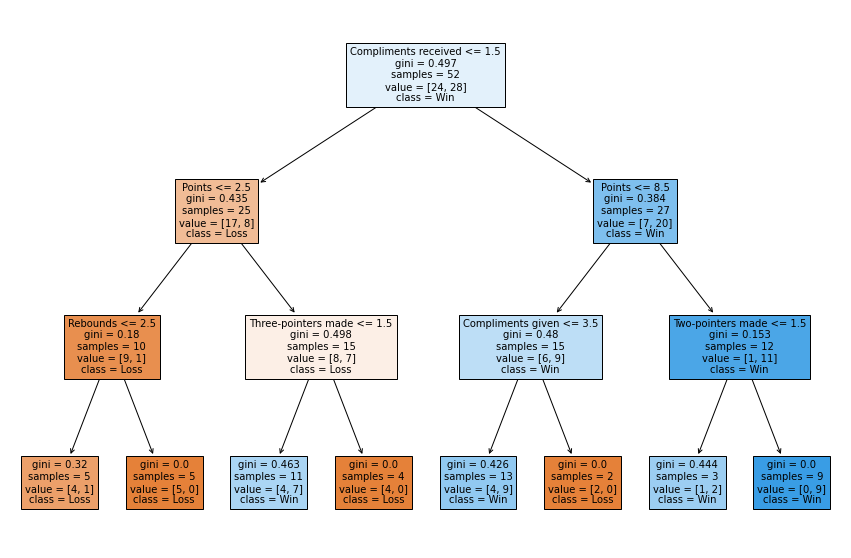

In [11]:
utils.tree(X_train, y_train, X_test, y_test, X)

The distribution of the class labels is 60% Wins and 40% Loss. I evaluated the performance with accuracy and precision scores. The Decision tree classifier performed much better in accuracy and precision vs the kNN. A huge challenge with classification is the available training data. I only had 58 training instances and thus my accuracy and could not break 61%.

## Conclusion

The dataset I used was too small for effective classification and machine learning use. However, it was useful to see which attributes contributed the most to winning and my personal performance. I was dissapointed to see that giving out compliments to my teammates didnt effect the game outcome. The ethical impacts of this work will be wide and potentially disatorous for team sports. The vast majority of people who view my work will now second guess whether or not using their spare breath to give their teammate a compliment is worth it. My work may also be cited as evidence that put ups are in fact useless. However I hope people can look past the raw data evidence in my work and come to the conclusion that there is more to life than just winning a basketball game. That next compliment you were thinking about giving your teammate after they hit a good shot might not help your team win but it will help your teammate feel like a winner. 